things to do
- fix/add comments
- make a readme markdown summarizing the project

##Table of Contents

>>[Section 1: Data Preprocessing](#scrollTo=PDd90ezQ3gbt)

>>[Section 2: Create a Logistic Regression to Predict Hospital Readmittance](#scrollTo=U_2bbftU9gwB)

>>[Section 3: Split the data into train & test, then shuffle](#scrollTo=CNgJ8qP3klSs)

>>[Section 4: Logistic Regression Model](#scrollTo=LHI43SFL3W8C)


## Section 1: Data Preprocessing

###Data Initialization and Initial Inspection

In [1]:
# Import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler  # to standardize the data to be of similar magnitude
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers

In [2]:
# Load the dataset
raw_data = pd.read_csv('hospital_readmissions.csv')
raw_data.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [3]:
# Make a copy of the raw dataset so the original remains untouched
data = raw_data.copy()

In [4]:
# Check for missing values
missing_values_count = data.isnull().sum()
missing_values_count

age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64

####Convert yes/no values to binary

In [5]:
# 'change'
data['change'] = data['change'].map({'yes':1,'no':0})

# 'diabetes_med'
data['diabetes_med'] = data['diabetes_med'].map({'yes':1,'no':0})

# 'readmitted'
data['readmitted'] = data['readmitted'].map({'yes':1,'no':0})

data

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,0,1,0
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,0,1,0
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,1,1,1
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,1,1,1
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,[80-90),14,77,1,30,0,0,0,Missing,Circulatory,Other,Circulatory,no,normal,0,0,1
24996,[80-90),2,66,0,24,0,0,0,Missing,Digestive,Injury,Other,no,high,1,1,1
24997,[70-80),5,12,0,6,0,1,0,Missing,Other,Other,Other,normal,no,0,0,1
24998,[70-80),2,61,3,15,0,0,0,Family/GeneralPractice,Respiratory,Diabetes,Other,no,no,1,1,0


####Create a dummy variable for `glucose_test`

In [6]:
# Assessing the types of values for 'glucose_test'

data.glucose_test.unique()

array(['no', 'normal', 'high'], dtype=object)

In [7]:
# Using one-hot encoding
dummy_glucose_test = pd.get_dummies(data['glucose_test'], prefix='glucose')

# Concatenating the dummy variables to the existing dataframe
data = pd.concat([data,dummy_glucose_test],axis=1)

# Deleting the 'glucose_test' column
data = data.drop('glucose_test',axis=1)

data

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,A1Ctest,change,diabetes_med,readmitted,glucose_high,glucose_no,glucose_normal
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,0,1,0,0,1,0
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,0,1,0,0,1,0
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,1,1,1,0,1,0
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,1,1,1,0,1,0
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,[80-90),14,77,1,30,0,0,0,Missing,Circulatory,Other,Circulatory,normal,0,0,1,0,1,0
24996,[80-90),2,66,0,24,0,0,0,Missing,Digestive,Injury,Other,high,1,1,1,0,1,0
24997,[70-80),5,12,0,6,0,1,0,Missing,Other,Other,Other,no,0,0,1,0,0,1
24998,[70-80),2,61,3,15,0,0,0,Family/GeneralPractice,Respiratory,Diabetes,Other,no,1,1,0,0,1,0


####Create a dummy variable for `A1Ctest`

In [8]:
# Assessing the types of values for 'A1Ctest'

data.A1Ctest.unique()

array(['no', 'normal', 'high'], dtype=object)

In [9]:
# Using one-hot encoding
dummy_A1Ctest = pd.get_dummies(data['A1Ctest'], prefix='A1Ctest')

# Concatenating the dummy variables to the existing dataframe
data = pd.concat([data,dummy_A1Ctest],axis=1)

# Deleting the 'A1Ctest' column
data = data.drop('A1Ctest',axis=1)

data

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,...,diag_3,change,diabetes_med,readmitted,glucose_high,glucose_no,glucose_normal,A1Ctest_high,A1Ctest_no,A1Ctest_normal
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,...,Other,0,1,0,0,1,0,0,1,0
1,[70-80),3,34,2,13,0,0,0,Other,Other,...,Other,0,1,0,0,1,0,0,1,0
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,...,Circulatory,1,1,1,0,1,0,0,1,0
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,...,Diabetes,1,1,1,0,1,0,0,1,0
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,...,Respiratory,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,[80-90),14,77,1,30,0,0,0,Missing,Circulatory,...,Circulatory,0,0,1,0,1,0,0,0,1
24996,[80-90),2,66,0,24,0,0,0,Missing,Digestive,...,Other,1,1,1,0,1,0,1,0,0
24997,[70-80),5,12,0,6,0,1,0,Missing,Other,...,Other,0,0,1,0,0,1,0,1,0
24998,[70-80),2,61,3,15,0,0,0,Family/GeneralPractice,Respiratory,...,Other,1,1,0,0,1,0,0,1,0


####Convert the age values from a range to a number

In [10]:
# Assessing the types of values for 'age'

data.age.unique()

array(['[70-80)', '[50-60)', '[60-70)', '[40-50)', '[80-90)', '[90-100)'],
      dtype=object)

In [11]:
# Creating a dictionary mapping the ranges to the average number in the range
age_mapping = {'[40-50)': 45,
               '[70-80)': 75,
               '[50-60)': 55,
               '[60-70)': 65,
               '[80-90)': 85,
               '[90-100)': 95
}

# Mapping the age ranges to numbers
data['age'] = data['age'].map(age_mapping)

# Converting the 'age' column to a numeric datatype from series
data['age'] = pd.to_numeric(data['age'])

data

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,...,diag_3,change,diabetes_med,readmitted,glucose_high,glucose_no,glucose_normal,A1Ctest_high,A1Ctest_no,A1Ctest_normal
0,75,8,72,1,18,2,0,0,Missing,Circulatory,...,Other,0,1,0,0,1,0,0,1,0
1,75,3,34,2,13,0,0,0,Other,Other,...,Other,0,1,0,0,1,0,0,1,0
2,55,5,45,0,18,0,0,0,Missing,Circulatory,...,Circulatory,1,1,1,0,1,0,0,1,0
3,75,2,36,0,12,1,0,0,Missing,Circulatory,...,Diabetes,1,1,1,0,1,0,0,1,0
4,65,1,42,0,7,0,0,0,InternalMedicine,Other,...,Respiratory,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,85,14,77,1,30,0,0,0,Missing,Circulatory,...,Circulatory,0,0,1,0,1,0,0,0,1
24996,85,2,66,0,24,0,0,0,Missing,Digestive,...,Other,1,1,1,0,1,0,1,0,0
24997,75,5,12,0,6,0,1,0,Missing,Other,...,Other,0,0,1,0,0,1,0,1,0
24998,75,2,61,3,15,0,0,0,Family/GeneralPractice,Respiratory,...,Other,1,1,0,0,1,0,0,1,0


###Converting `medical_specialty` categories into numerical values

In [12]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder to 'medical_specialty'
label_encoder.fit(data['medical_specialty'])

# Transform 'medical_specialty' using label encoding
data['medical_specialty_encoded'] = label_encoder.transform(data['medical_specialty'])

In [13]:
# Decode the encoded values to get the original medical specialty categories
original_categories = label_encoder.inverse_transform(data['medical_specialty_encoded'])

data

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,...,change,diabetes_med,readmitted,glucose_high,glucose_no,glucose_normal,A1Ctest_high,A1Ctest_no,A1Ctest_normal,medical_specialty_encoded
0,75,8,72,1,18,2,0,0,Missing,Circulatory,...,0,1,0,0,1,0,0,1,0,4
1,75,3,34,2,13,0,0,0,Other,Other,...,0,1,0,0,1,0,0,1,0,5
2,55,5,45,0,18,0,0,0,Missing,Circulatory,...,1,1,1,0,1,0,0,1,0,4
3,75,2,36,0,12,1,0,0,Missing,Circulatory,...,1,1,1,0,1,0,0,1,0,4
4,65,1,42,0,7,0,0,0,InternalMedicine,Other,...,0,1,0,0,1,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,85,14,77,1,30,0,0,0,Missing,Circulatory,...,0,0,1,0,1,0,0,0,1,4
24996,85,2,66,0,24,0,0,0,Missing,Digestive,...,1,1,1,0,1,0,1,0,0,4
24997,75,5,12,0,6,0,1,0,Missing,Other,...,0,0,1,0,0,1,0,1,0,4
24998,75,2,61,3,15,0,0,0,Family/GeneralPractice,Respiratory,...,1,1,0,0,1,0,0,1,0,2


In [14]:
# Get the mapping of encoded values to original categories
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping of encoded values to original categories
for category, encoded_value in mapping.items():
    print(f"Encoded Value: {encoded_value} -> Medical Specialty: {category}")

Encoded Value: 0 -> Medical Specialty: Cardiology
Encoded Value: 1 -> Medical Specialty: Emergency/Trauma
Encoded Value: 2 -> Medical Specialty: Family/GeneralPractice
Encoded Value: 3 -> Medical Specialty: InternalMedicine
Encoded Value: 4 -> Medical Specialty: Missing
Encoded Value: 5 -> Medical Specialty: Other
Encoded Value: 6 -> Medical Specialty: Surgery


In [15]:
# Remove the original 'medical_specialty' column
data = data.drop(['medical_specialty'],axis=1)

###Convert `diag_1`, `diag_2`, `diag_3` categories into numerical values

In [16]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder to 'medical_specialty'
label_encoder.fit(data['diag_1'])

# Transform 'medical_specialty' using label encoding
data['diag_1_encoded'] = label_encoder.transform(data['diag_1'])

# Decode the encoded values to get the original medical specialty categories
original_categories = label_encoder.inverse_transform(data['diag_1_encoded'])

In [17]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder to 'medical_specialty'
label_encoder.fit(data['diag_2'])

# Transform 'medical_specialty' using label encoding
data['diag_2_encoded'] = label_encoder.transform(data['diag_2'])

# Decode the encoded values to get the original medical specialty categories
original_categories = label_encoder.inverse_transform(data['diag_2_encoded'])

In [18]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder to 'medical_specialty'
label_encoder.fit(data['diag_3'])

# Transform 'medical_specialty' using label encoding
data['diag_3_encoded'] = label_encoder.transform(data['diag_3'])

# Decode the encoded values to get the original medical specialty categories
original_categories = label_encoder.inverse_transform(data['diag_3_encoded'])

data

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,diag_1,diag_2,...,glucose_high,glucose_no,glucose_normal,A1Ctest_high,A1Ctest_no,A1Ctest_normal,medical_specialty_encoded,diag_1_encoded,diag_2_encoded,diag_3_encoded
0,75,8,72,1,18,2,0,0,Circulatory,Respiratory,...,0,1,0,0,1,0,4,0,7,6
1,75,3,34,2,13,0,0,0,Other,Other,...,0,1,0,0,1,0,5,6,6,6
2,55,5,45,0,18,0,0,0,Circulatory,Circulatory,...,0,1,0,0,1,0,4,0,0,0
3,75,2,36,0,12,1,0,0,Circulatory,Other,...,0,1,0,0,1,0,4,0,6,1
4,65,1,42,0,7,0,0,0,Other,Circulatory,...,0,1,0,0,1,0,3,6,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,85,14,77,1,30,0,0,0,Circulatory,Other,...,0,1,0,0,0,1,4,0,6,0
24996,85,2,66,0,24,0,0,0,Digestive,Injury,...,0,1,0,1,0,0,4,2,3,6
24997,75,5,12,0,6,0,1,0,Other,Other,...,0,0,1,0,1,0,4,6,6,6
24998,75,2,61,3,15,0,0,0,Respiratory,Diabetes,...,0,1,0,0,1,0,2,7,1,6


In [19]:
# Get the mapping of encoded values to original categories
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping of encoded values to original categories
for category, encoded_value in mapping.items():
    print(f"Encoded Value: {encoded_value} -> Diagnosis: {category}")

Encoded Value: 0 -> Diagnosis: Circulatory
Encoded Value: 1 -> Diagnosis: Diabetes
Encoded Value: 2 -> Diagnosis: Digestive
Encoded Value: 3 -> Diagnosis: Injury
Encoded Value: 4 -> Diagnosis: Missing
Encoded Value: 5 -> Diagnosis: Musculoskeletal
Encoded Value: 6 -> Diagnosis: Other
Encoded Value: 7 -> Diagnosis: Respiratory


In [20]:
# Remove the original columns

data = data.drop(['diag_1','diag_2','diag_3'],axis=1)
print(data.columns)

Index(['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency', 'change',
       'diabetes_med', 'readmitted', 'glucose_high', 'glucose_no',
       'glucose_normal', 'A1Ctest_high', 'A1Ctest_no', 'A1Ctest_normal',
       'medical_specialty_encoded', 'diag_1_encoded', 'diag_2_encoded',
       'diag_3_encoded'],
      dtype='object')


###Final Data Reordering and Type Validation

In [21]:
# Reorganize column header positions
# Putting columns back in original order with new dummy and encoded variables
reordered = ['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency',
        'medical_specialty_encoded', 'diag_1_encoded', 'diag_2_encoded', 'diag_3_encoded',
        'glucose_no', 'glucose_normal','glucose_high', 'A1Ctest_no', 'A1Ctest_normal',
        'A1Ctest_high', 'change', 'diabetes_med', 'readmitted']

In [22]:
# Save preprocessed data into a new checkpoint
data_reordered = data.reindex(columns=reordered)
data_reordered.copy()
data_reordered

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty_encoded,diag_1_encoded,...,diag_3_encoded,glucose_no,glucose_normal,glucose_high,A1Ctest_no,A1Ctest_normal,A1Ctest_high,change,diabetes_med,readmitted
0,75,8,72,1,18,2,0,0,4,0,...,6,1,0,0,1,0,0,0,1,0
1,75,3,34,2,13,0,0,0,5,6,...,6,1,0,0,1,0,0,0,1,0
2,55,5,45,0,18,0,0,0,4,0,...,0,1,0,0,1,0,0,1,1,1
3,75,2,36,0,12,1,0,0,4,0,...,1,1,0,0,1,0,0,1,1,1
4,65,1,42,0,7,0,0,0,3,6,...,7,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,85,14,77,1,30,0,0,0,4,0,...,0,1,0,0,0,1,0,0,0,1
24996,85,2,66,0,24,0,0,0,4,2,...,6,1,0,0,0,0,1,1,1,1
24997,75,5,12,0,6,0,1,0,4,6,...,6,0,1,0,1,0,0,0,0,1
24998,75,2,61,3,15,0,0,0,2,7,...,6,1,0,0,1,0,0,1,1,0


In [23]:
# Check the datatypes of all variables
# All datatypes are integers, which is what we want to we can create analyses later
print(type(data_reordered['age'][0]))
print(type(data_reordered['time_in_hospital'][0]))
print(type(data_reordered['n_lab_procedures'][0]))
print(type(data_reordered['n_procedures'][0]))
print(type(data_reordered['n_medications'][0]))
print(type(data_reordered['n_outpatient'][0]))
print(type(data_reordered['n_inpatient'][0]))
print(type(data_reordered['n_emergency'][0]))
print(type(data_reordered['medical_specialty_encoded'][0]))
print(type(data_reordered['diag_1_encoded'][0]))
print(type(data_reordered['diag_2_encoded'][0]))
print(type(data_reordered['diag_3_encoded'][0]))
print(type(data_reordered['glucose_no'][0]))
print(type(data_reordered['glucose_normal'][0]))
print(type(data_reordered['glucose_high'][0]))
print(type(data_reordered['A1Ctest_no'][0]))
print(type(data_reordered['A1Ctest_normal'][0]))
print(type(data_reordered['A1Ctest_high'][0]))
print(type(data_reordered['change'][0]))
print(type(data_reordered['diabetes_med'][0]))
print(type(data_reordered['readmitted'][0]))

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>


In [24]:
# Save current dataframe as a csv file
file_path = 'hospital_readmissions_preprocessed.csv'
data_reordered.to_csv(file_path, index=False)

## Section 2: Create a Logistic Regression to Predict Hospital Readmittance

###Load in the preprocessed dataset and create targets

In [25]:
data_preprocessed = pd.read_csv('hospital_readmissions_preprocessed.csv')
data_preprocessed.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty_encoded,diag_1_encoded,...,diag_3_encoded,glucose_no,glucose_normal,glucose_high,A1Ctest_no,A1Ctest_normal,A1Ctest_high,change,diabetes_med,readmitted
0,75,8,72,1,18,2,0,0,4,0,...,6,1,0,0,1,0,0,0,1,0
1,75,3,34,2,13,0,0,0,5,6,...,6,1,0,0,1,0,0,0,1,0
2,55,5,45,0,18,0,0,0,4,0,...,0,1,0,0,1,0,0,1,1,1
3,75,2,36,0,12,1,0,0,4,0,...,1,1,0,0,1,0,0,1,1,1
4,65,1,42,0,7,0,0,0,3,6,...,7,1,0,0,1,0,0,0,1,0


In [26]:
# Extract the 'readmitted' column as the target variable
targets = data['readmitted']

# Check if dataset is balanced (what % of targets are 1s)
# targets.sum() will give us the number of 1s that there are
# shape[0] will give us the length of the targets array
targets.sum() / targets.shape[0]

# This means that 47% of the patients have been readmitted

0.47016

###Select the inputs for the regression

In [27]:
data_preprocessed.shape

(25000, 21)

In [28]:
# Viewing the entire dataset except the target variable
data_preprocessed.iloc[:,:-1]

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty_encoded,diag_1_encoded,diag_2_encoded,diag_3_encoded,glucose_no,glucose_normal,glucose_high,A1Ctest_no,A1Ctest_normal,A1Ctest_high,change,diabetes_med
0,75,8,72,1,18,2,0,0,4,0,7,6,1,0,0,1,0,0,0,1
1,75,3,34,2,13,0,0,0,5,6,6,6,1,0,0,1,0,0,0,1
2,55,5,45,0,18,0,0,0,4,0,0,0,1,0,0,1,0,0,1,1
3,75,2,36,0,12,1,0,0,4,0,6,1,1,0,0,1,0,0,1,1
4,65,1,42,0,7,0,0,0,3,6,0,7,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,85,14,77,1,30,0,0,0,4,0,6,0,1,0,0,0,1,0,0,0
24996,85,2,66,0,24,0,0,0,4,2,3,6,1,0,0,0,0,1,1,1
24997,75,5,12,0,6,0,1,0,4,6,6,6,0,1,0,1,0,0,0,0
24998,75,2,61,3,15,0,0,0,2,7,1,6,1,0,0,1,0,0,1,1


In [29]:
# Creating a variable that will contain the inputs (excluding the targets/'readmitted')
unscaled_inputs = data_preprocessed.iloc[:,:-1]

###Standardize the data

In [30]:
# Defining the scaler as an object
readmittance_scaler = StandardScaler()

In [31]:
class CustomScaler(BaseEstimator,TransformerMixin):

    # Initialize a CustomScaler object with the specified columns to scale

    def __init__(self,columns):
        # Create a StandardScaler object for scaling
        self.scaler = StandardScaler()
        # Store the columns to be scaled
        self.columns = columns
        # Initialize variables for mean and variance
        self.mean_ = None
        self.var_ = None


    # Fit the scaler based on the input data

    def fit(self, X, y=None):
        #Fit the scaler to the specified columns in the input data
        self.scaler.fit(X[self.columns], y)
        # Calculate and store the mean and variance of the specified columns
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self

    # Transform the input data by applying scaling to the specified columns

    def transform(self, X, y=None, copy=None):

        # Record the initial order of the columns
        init_col_order = X.columns

        # Scale all the features specified when creating the instance of the class
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)

        # Create a variable containing all information that was not scaled
        X_not_scaled = X.loc[:,~X.columns.isin(self.columns)]

        # Return a dataframe containing all scaled features and all 'not scaled' features,
        # preserving the original order of columns
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]

In [32]:
# # Retrieve the list of columns in the unscaled_inputs dataframe
unscaled_inputs.columns.values

array(['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency',
       'medical_specialty_encoded', 'diag_1_encoded', 'diag_2_encoded',
       'diag_3_encoded', 'glucose_no', 'glucose_normal', 'glucose_high',
       'A1Ctest_no', 'A1Ctest_normal', 'A1Ctest_high', 'change',
       'diabetes_med'], dtype=object)

In [33]:
# Need to omit the columns with dummy variables, or else we would lose the interpretability of the dummy variables
columns_to_scale = ['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency','change',
       'diabetes_med']

In [34]:
readmittance_scaler = CustomScaler(columns_to_scale)

In [35]:
readmittance_scaler.fit(unscaled_inputs)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


CustomScaler(columns=['age', 'time_in_hospital', 'n_lab_procedures',
                      'n_procedures', 'n_medications', 'n_outpatient',
                      'n_inpatient', 'n_emergency', 'change', 'diabetes_med'])

In [36]:
# Standardize the data using transform
scaled_inputs = readmittance_scaler.transform(unscaled_inputs)

In [37]:
scaled_inputs

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty_encoded,diag_1_encoded,diag_2_encoded,diag_3_encoded,glucose_no,glucose_normal,glucose_high,A1Ctest_no,A1Ctest_normal,A1Ctest_high,change,diabetes_med
0,0.498538,1.181671,1.451151,-0.205440,0.216814,1.366510,-0.522918,-0.210644,4,0,7,6,1,0,0,1,0,0,-0.923181,0.547893
1,0.498538,-0.484212,-0.466276,0.377601,-0.403505,-0.306494,-0.522918,-0.210644,5,6,6,6,1,0,0,1,0,0,-0.923181,0.547893
2,-1.021673,0.182141,0.088769,-0.788481,0.216814,-0.306494,-0.522918,-0.210644,4,0,0,0,1,0,0,1,0,0,1.083211,0.547893
3,0.498538,-0.817389,-0.365359,-0.788481,-0.527569,0.530008,-0.522918,-0.210644,4,0,6,1,1,0,0,1,0,0,1.083211,0.547893
4,-0.261568,-1.150566,-0.062607,-0.788481,-1.147888,-0.306494,-0.522918,-0.210644,3,6,0,7,1,0,0,1,0,0,-0.923181,0.547893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,1.258643,3.180732,1.703444,-0.205440,1.705579,-0.306494,-0.522918,-0.210644,4,0,6,0,1,0,0,0,1,0,-0.923181,-1.825172
24996,1.258643,-0.817389,1.148400,-0.788481,0.961196,-0.306494,-0.522918,-0.210644,4,2,3,6,1,0,0,0,0,1,1.083211,0.547893
24997,0.498538,0.182141,-1.576365,-0.788481,-1.271951,-0.306494,0.326030,-0.210644,4,6,6,6,0,1,0,1,0,0,-0.923181,-1.825172
24998,0.498538,-0.817389,0.896107,0.960642,-0.155377,-0.306494,-0.522918,-0.210644,2,7,1,6,1,0,0,1,0,0,1.083211,0.547893


In [38]:
# Verifying the shape of the array to ensure it matches the unscaled dataset, excluding the 'readmitted' column
scaled_inputs.shape

(25000, 20)

## Section 3: Data Splitting into Train and Test Sets with Shuffling

In [39]:
train_test_split(scaled_inputs, targets)

[            age  time_in_hospital  n_lab_procedures  n_procedures  \
 20910 -1.021673         -1.150566         -0.415817      0.960642   
 434   -1.781778         -1.150566          0.643813      0.377601   
 1444   1.258643          1.514848          0.441979      0.960642   
 1408  -1.021673          0.515318          0.492438     -0.788481   
 9302   0.498538          1.848025          0.997024     -0.788481   
 ...         ...               ...               ...           ...   
 9789   0.498538         -1.150566         -0.668110      0.377601   
 9423  -0.261568          2.847555          1.249317      0.960642   
 22316 -0.261568          0.515318          0.088769      0.960642   
 16455  1.258643          0.515318          1.905279     -0.205440   
 12140 -0.261568         -0.484212          0.341062     -0.788481   
 
        n_medications  n_outpatient  n_inpatient  n_emergency  \
 20910      -0.775696     -0.306494    -0.522918    -0.210644   
 434        -0.279441     -0

In [40]:
# Declare 4 variables for the split
# Splitting the dataset so 80% for training, 20% for testing
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs,
                                                    targets,
                                                    train_size = 0.8,
                                                    test_size = 0.2,
                                                    random_state = 20)

In [41]:
# Check the shape of the train inputs and targets
print(x_train.shape, y_train.shape)

(20000, 20) (20000,)


In [42]:
# Check the shape of the test inputs and targets
print(x_test.shape, y_test.shape)

(5000, 20) (5000,)


## Section 4: Logistic Regression Model

###Model Creation and Training

In [43]:
# Create a logistic regression object
reg = LogisticRegression()

In [44]:
# Fit the train inputs
reg.fit(x_train,y_train)

LogisticRegression()

In [45]:
# Assess the train accuracy of the model
reg.score(x_train,y_train)

0.6108

In [46]:
# Manually assessing the train accuracy
# Find the model outputs according to our model
model_outputs = reg.predict(x_train)
model_outputs

array([1, 1, 1, ..., 1, 1, 0])

In [47]:
# Compare them with the targets
model_outputs == y_train

3572      True
6634      True
6745      True
4567     False
19552    False
         ...  
14729     True
23452     True
23775     True
4367     False
15715     True
Name: readmitted, Length: 20000, dtype: bool

In [48]:
# Find out in how many instances we predicted correctly
np.sum((model_outputs==y_train))

12216

In [49]:
# Get the total number of instances
model_outputs.shape[0]

20000

In [50]:
# Calculate the accuracy of the model
# Same as when we used reg.score
np.sum((model_outputs==y_train)) / model_outputs.shape[0]

0.6108

###Extracting Model Coefficients and Interpretation

In [51]:
# Get the intercept (bias) of our model
reg.intercept_

array([0.09135714])

In [52]:
# Get the coefficients (weights) of our model
reg.coef_

array([[ 0.05734576,  0.04390673,  0.0461394 , -0.09012486,  0.01439352,
         0.16187974,  0.44726618,  0.17685556, -0.02868277, -0.02365755,
        -0.00788447, -0.01258364, -0.03725775,  0.02994741,  0.09701489,
         0.10100336, -0.06253156,  0.05123274,  0.02887867,  0.10084249]])

In [53]:
# Save the names of the columns in an ad-hoc variable
feature_name = unscaled_inputs.columns.values

In [54]:
# Create a summary table
summary_table = pd.DataFrame(columns=['Feature name'],data = feature_name)

# Add the coefficient values to the table
summary_table['Coefficient'] = np.transpose(reg.coef_)

# Move all indices by 1
summary_table.index = summary_table.index + 1

# Move 'intercept' to the top
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]

# Sort the dataframe by index
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficient
0,Intercept,0.091357
1,age,0.057346
2,time_in_hospital,0.043907
3,n_lab_procedures,0.046139
4,n_procedures,-0.090125
5,n_medications,0.014394
6,n_outpatient,0.161880
7,n_inpatient,0.447266
8,n_emergency,0.176856
9,medical_specialty_encoded,-0.028683


###Interpreting Model Coefficients

Text(0.5, 1.0, 'Glucose test serum test result VS. Readmission')

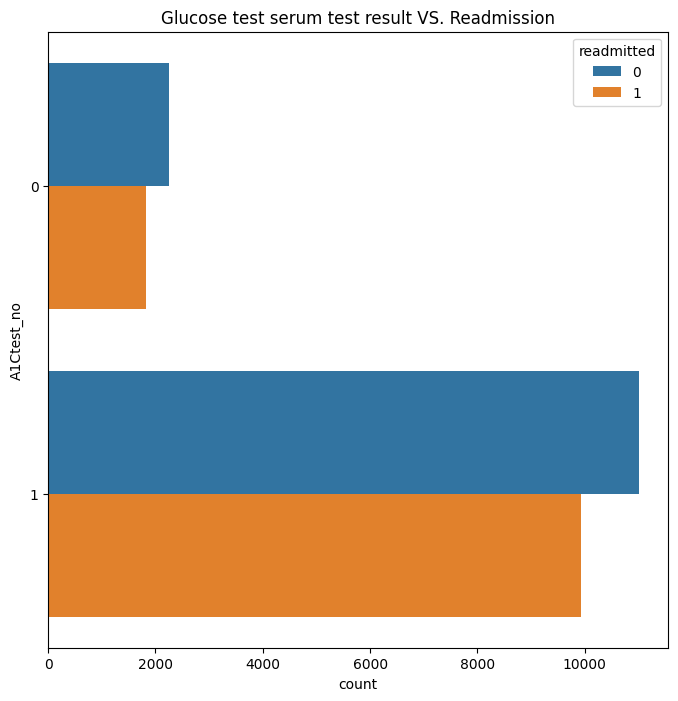

In [55]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y = data_preprocessed['A1Ctest_no'], hue = data_preprocessed['readmitted']).set_title('Glucose test serum test result VS. Readmission')

In [56]:
# Create a Series called 'odds_ratio' which will show the odds ratio
summary_table['Odds_ratio'] = np.exp(summary_table.Coefficient)

summary_table

,Feature name,Coefficient,Odds_ratio
0,Intercept,0.091357,1.095660
1,age,0.057346,1.059022
2,time_in_hospital,0.043907,1.044885
3,n_lab_procedures,0.046139,1.047220
4,n_procedures,-0.090125,0.913817
5,n_medications,0.014394,1.014498
6,n_outpatient,0.161880,1.175719
7,n_inpatient,0.447266,1.564031
8,n_emergency,0.176856,1.193459
9,medical_specialty_encoded,-0.028683,0.971725


In [57]:
# Sort the table from greatest odds ratio
sorted_table = summary_table.sort_values(by='Odds_ratio', ascending=False)

sorted_table

,Feature name,Coefficient,Odds_ratio
7,n_inpatient,0.447266,1.564031
8,n_emergency,0.176856,1.193459
6,n_outpatient,0.161880,1.175719
16,A1Ctest_no,0.101003,1.106280
20,diabetes_med,0.100842,1.106102
15,glucose_high,0.097015,1.101877
0,Intercept,0.091357,1.095660
1,age,0.057346,1.059022
18,A1Ctest_high,0.051233,1.052568
3,n_lab_procedures,0.046139,1.047220


In [58]:
print(type(data_preprocessed))

<class 'pandas.core.frame.DataFrame'>


###Data Preprocessing, Model Training, and Evaluation

In [59]:
# Define a function that will scale the inputs
def scale(features, label):
    features = tf.cast(features, tf.float32)
    return features, label

# Create TensorFlow Dataset from pandas dataframe
dataset = tf.data.Dataset.from_tensor_slices((data_preprocessed.drop('readmitted', axis=1).values, data_preprocessed['readmitted'].values))
scaled_train_data = dataset.map(scale)

# Split the data into training and validation sets
train_size = int(0.8 * len(data_preprocessed))
train_data = scaled_train_data.take(train_size)
validation_data = scaled_train_data.skip(train_size)

# Preprocess the data - shuffle and batch
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_data = train_data.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
validation_data = validation_data.batch(BATCH_SIZE)


# Model Definition and Training
# Define the model
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(20,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
num_epochs = 10
model.fit(train_data, epochs=num_epochs, validation_data=validation_data)


# Model Evaluation
# Evaluate the model on test data
num_test_samples = 25000
test_data = dataset.batch(num_test_samples)
test_loss, test_accuracy = model.evaluate(test_data)
print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

# Calculate the number of validation samples
num_validation_samples = int(0.1 * len(data_preprocessed))
num_validation_samples = tf.cast(num_validation_samples, tf.int64)

# Store the number of test samples
num_test_samples = 25000  # Replace with the actual number of test samples in your dataset
num_test_samples = tf.cast(num_test_samples, tf.int64)

Epoch 1/10
313/313 [==============================] - 4s 7ms/step - loss: 0.7534 - accuracy: 0.5626 - val_loss: 0.6863 - val_accuracy: 0.5752
Epoch 2/10
313/313 [==============================] - 3s 7ms/step - loss: 0.6877 - accuracy: 0.5823 - val_loss: 0.7080 - val_accuracy: 0.5660
Epoch 3/10
313/313 [==============================] - 3s 7ms/step - loss: 0.6778 - accuracy: 0.5907 - val_loss: 0.6795 - val_accuracy: 0.5880
Epoch 4/10
313/313 [==============================] - 4s 10ms/step - loss: 0.6778 - accuracy: 0.5872 - val_loss: 0.6822 - val_accuracy: 0.5798
Epoch 5/10
313/313 [==============================] - 3s 7ms/step - loss: 0.6728 - accuracy: 0.5944 - val_loss: 0.6735 - val_accuracy: 0.5824
Epoch 6/10
313/313 [==============================] - 3s 7ms/step - loss: 0.6728 - accuracy: 0.5944 - val_loss: 0.6873 - val_accuracy: 0.5840
Epoch 7/10
313/313 [==============================] - 2s 6ms/step - loss: 0.6630 - accuracy: 0.6054 - val_loss: 0.6774 - val_accuracy: 0.5722
Epoch

###Data Scaling and Dataset Creation

In [60]:
# Create a function to scale the inputs
def scale(features, label):
    features = tf.cast(features, tf.float32)
    return features, label

# Create TensorFlow Dataset from pandas DataFrame
dataset = tf.data.Dataset.from_tensor_slices((data_preprocessed.drop('readmitted', axis=1).values, data_preprocessed['readmitted'].values))
scaled_train_and_validation_data = dataset.map(scale)

###Data Splitting and Batching

In [61]:
BUFFER_SIZE = 25000

shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)

# Split the data into training and validation sets
validation_data = shuffled_train_and_validation_data.take(num_validation_samples)
train_data = shuffled_train_and_validation_data.skip(num_validation_samples)

In [62]:
# Using mini-batch gradient descent
BATCH_SIZE = 100

# Batch the training data
train_data = train_data.batch(BATCH_SIZE)

# Batch the validation data
validation_data = validation_data.batch(num_validation_samples)

# Batch the test data
test_data = dataset.batch(num_test_samples)

# Get validation inputs and targets
validation_inputs, validation_targets = next(iter(validation_data))

###Neural Network Model Definition and Compilation

In [63]:
input_size = 20
output_size = 1
hidden_layer_size = 50

# Define the model
model = tf.keras.Sequential([
                            tf.keras.layers.Flatten(input_shape=(20,)),
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(output_size, activation='sigmoid')
                            ])

# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 50)                1050      
                                                                 
 dense_4 (Dense)             (None, 50)                2550      
                                                                 
 dense_5 (Dense)             (None, 50)                2550      
                                                                 
 dense_6 (Dense)             (None, 50)                2550      
                                                                 
 dense_7 (Dense)             (None, 50)                2550      
                                                                 
 dense_8 (Dense)             (None, 50)               

### Hyperparameter Tuning Using GridSearchCV

In [64]:
from sklearn.model_selection import GridSearchCV
param_grid = {'learning_rate': [0.001, 0.01, 0.1], 'batch_size': [32, 64, 128]}
grid_search = GridSearchCV(model, param_grid, cv=3)

###Training the Model with Tuned Hyperparameters

In [65]:
# Setting the number of epochs
num_epochs = 8

# Fitting the model
model.fit(train_data, epochs = num_epochs, validation_data=(validation_inputs, validation_targets), verbose=2)

Epoch 1/8
225/225 - 4s - loss: 0.6948 - accuracy: 0.5337 - val_loss: 0.7077 - val_accuracy: 0.4992 - 4s/epoch - 18ms/step
Epoch 2/8
225/225 - 2s - loss: 0.6772 - accuracy: 0.5776 - val_loss: 0.6625 - val_accuracy: 0.6000 - 2s/epoch - 7ms/step
Epoch 3/8
225/225 - 2s - loss: 0.6643 - accuracy: 0.6004 - val_loss: 0.6802 - val_accuracy: 0.5800 - 2s/epoch - 7ms/step
Epoch 4/8
225/225 - 2s - loss: 0.6617 - accuracy: 0.6041 - val_loss: 0.6535 - val_accuracy: 0.6092 - 2s/epoch - 7ms/step
Epoch 5/8
225/225 - 2s - loss: 0.6575 - accuracy: 0.6106 - val_loss: 0.6594 - val_accuracy: 0.6064 - 2s/epoch - 9ms/step
Epoch 6/8
225/225 - 2s - loss: 0.6568 - accuracy: 0.6123 - val_loss: 0.6620 - val_accuracy: 0.5912 - 2s/epoch - 8ms/step
Epoch 7/8
225/225 - 2s - loss: 0.6575 - accuracy: 0.6099 - val_loss: 0.6548 - val_accuracy: 0.6088 - 2s/epoch - 7ms/step
Epoch 8/8
225/225 - 2s - loss: 0.6564 - accuracy: 0.6128 - val_loss: 0.6509 - val_accuracy: 0.6096 - 2s/epoch - 7ms/step


In [66]:
# Evaluate the model with tuned hyperparameters on test data
test_loss, test_accuracy = model.evaluate(test_data)

print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

# Test accuracy went from  60.52% -> 61.78%

1/1 [==============================] - 0s 277ms/step - loss: 0.6549 - accuracy: 0.6178
Test loss: 0.65. Test accuracy: 61.78%
